#**1.Teaching materials for AI beginners.**  
##Image recognition  
A teaching material that allows you to learn image recognition using the cifar10 dataset.

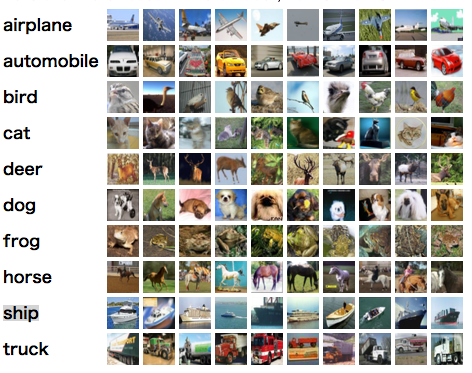

##cifar10 deteset
60,000 in total  
Image size is 32 pixels x 32 pixels  
RGB 3-channel color image  
Class labels are airplane, automobile, bird, cat, deer, dog, frog, horse, ship,  truck and 10 classes  
It is divided into 50,000 training images (5,000 for each class) and 10,000 test images (1000 for each class).

##**2.GPU status**

In [21]:
!nvidia-smi

Sun Oct 18 07:20:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    29W /  70W |    869MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**3.cifar10 training code**  
##Loading the required libraries

In [22]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

from PIL import Image
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model as plot
import random
import numpy as np

### Training model name and path definition

In [23]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# **Let's check what kind of data it is.**
### 32 x 32 pixels

train_label(y_train) ＝ 5


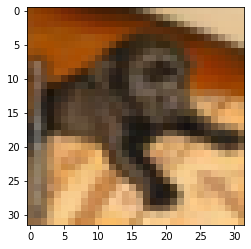

In [24]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

train_no = random.randint(0, 100)
 
print('train_label(y_train) ＝ %d' % y_train[train_no])

outImg = Image.fromarray(x_train[train_no].reshape((32,32,3))).convert("RGB")
plt.imshow(np.array(outImg))

##CNN model

In [25]:
def build_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  return model

##Training status history

In [26]:
def plot_history(history):
    # accuracy
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # loss
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

##Training start

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8160 - accuracy: 0.3340 - val_loss: 1.6017 - val_accuracy: 0.4249
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4997 - accuracy: 0.4546 - val_loss: 1.4102 - val_accuracy: 0.4902
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3668 - accuracy: 0.5097 - val_loss: 1.2486 - val_accuracy: 0.5558
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2750 - accuracy: 0.5474 - val_loss: 1.2124 - val_accuracy: 0.5757
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1918 - accuracy: 0.5804 - val_loss: 1.0733 - val_accuracy: 0.6211
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1188 - accuracy: 0.6060 - val_loss: 1.0457 - val_accuracy: 0.6379
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/

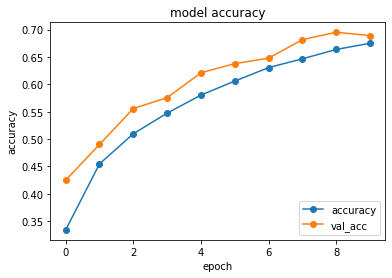

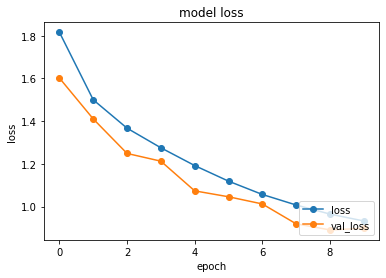

Test loss: 0.8981040120124817
Test accuracy: 0.6891000270843506


In [27]:
batch_size = 32
num_classes = 10
epochs = 10
num_predictions = 20

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = build_model()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)

# Training status history
plot_history(history)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#**4.Save of training mode**l

In [28]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


# **5.predict code**
### Upload the image you want to predict.

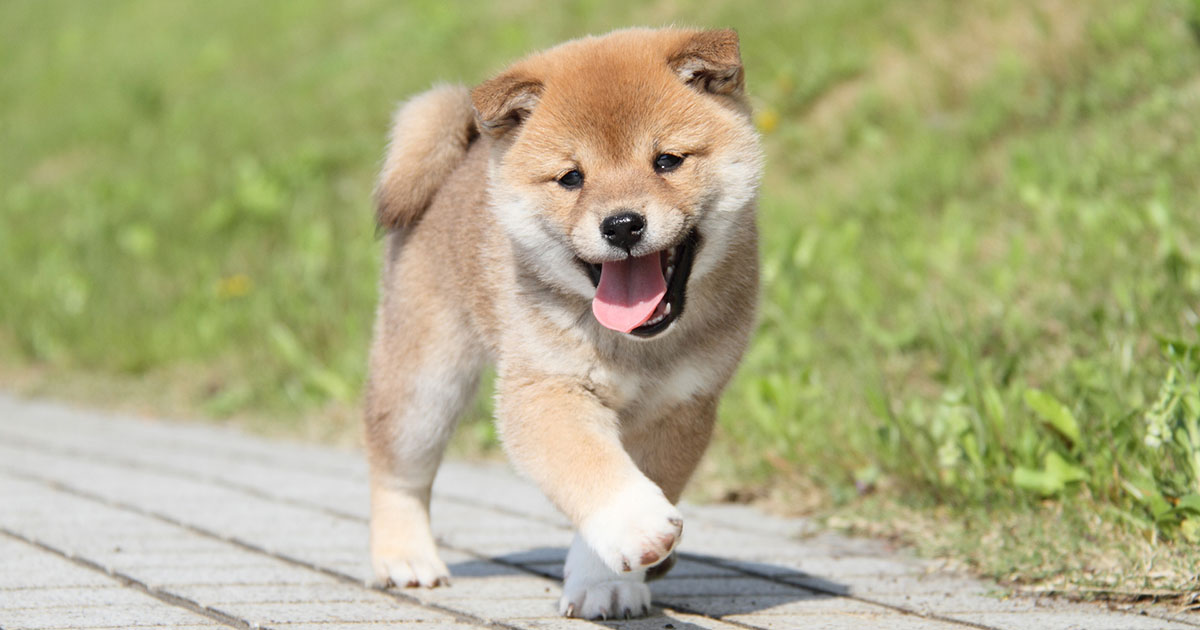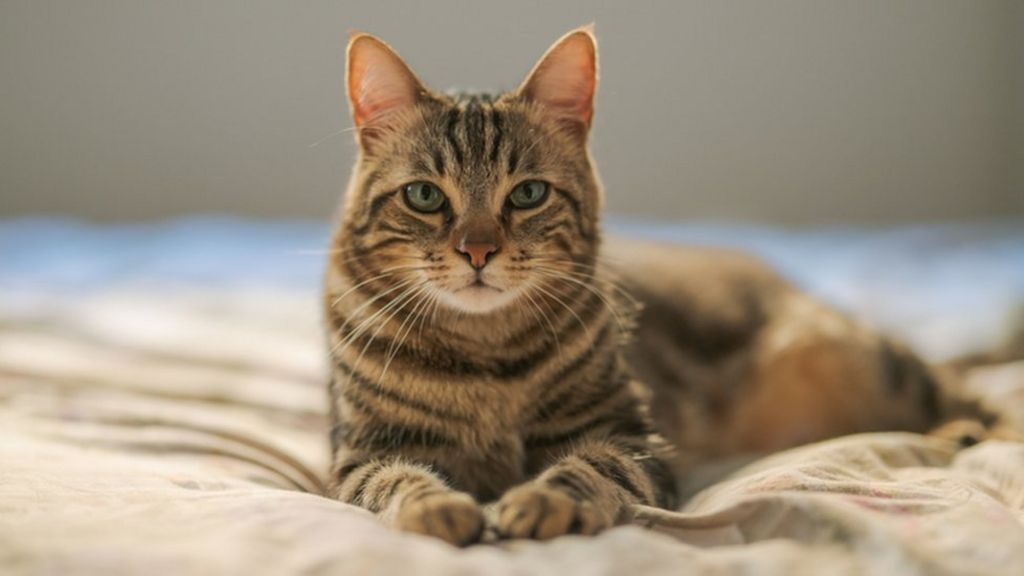

In [34]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


## Image recognition

In [35]:
import re
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array,load_img

from PIL import Image

def list_pictures(directory, ext='jpg|gif|png'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

if __name__ == "__main__":

    cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

    model = load_model('./saved_models/keras_cifar10_trained_model.h5')
    
    for picture in list_pictures('./'):

        image = Image.open(picture)
        image = image.resize((32, 32))
        resize_frame = np.asarray(image)
        data = convertCIFER10Data(resize_frame)

        ret = model.predict(data, batch_size=1)

        print("----------------------------------------------")
        print("I think...")

        bestnum = 0.0
        bestclass = 0
        for n in [0,1,2,3,4,5,6,7,8,9]:
            print("[{}] : {}%".format(cifar10_labels[n], round(ret[0][n]*100,2)))
            if bestnum < ret[0][n]:
                bestnum = ret[0][n]
                bestclass = n

        print(picture,'→',"I think this is a [{}].".format(cifar10_labels[bestclass]),"probability : {}%".format( round(bestnum*100,2) ))

----------------------------------------------
I think...
[airplane] : 0.05%
[automobile] : 0.0%
[bird] : 21.53%
[cat] : 6.38%
[deer] : 30.53%
[dog] : 38.89%
[frog] : 1.34%
[horse] : 1.26%
[ship] : 0.01%
[truck] : 0.0%
./dog.jpg → I think this is a [dog]. probability : 38.89%
----------------------------------------------
I think...
[airplane] : 0.54%
[automobile] : 0.0%
[bird] : 7.58%
[cat] : 49.46%
[deer] : 6.37%
[dog] : 25.0%
[frog] : 1.66%
[horse] : 8.66%
[ship] : 0.65%
[truck] : 0.07%
./cat.jpg → I think this is a [cat]. probability : 49.46%
----------------------------------------------
I think...
[airplane] : 0.14%
[automobile] : 0.0%
[bird] : 7.29%
[cat] : 1.63%
[deer] : 85.66%
[dog] : 1.38%
[frog] : 0.14%
[horse] : 3.74%
[ship] : 0.01%
[truck] : 0.0%
./deer.jpg → I think this is a [deer]. probability : 85.66%
